In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib


In [128]:
df1 = pd.read_csv("london.csv")

In [129]:
df1.head(5)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [130]:
df1.rename(columns = {'Area in sq ft':'sqft','No. of Bedrooms':'Bedroom','No. of Bathrooms':'Bathroom'}, inplace = True)

In [131]:
df1.shape

(3480, 11)

In [132]:
df1.groupby("City/County")["City/County"].count()

City/County
110 Battersea Park Road        1
27 Carlton Drive               1
311 Goldhawk Road              1
4 Circus Road West             1
52 Holloway Road               1
6 Deal Street                  1
82-88 Fulham High Street       1
Battersea                      2
Blackheath                     1
Bushey                         1
Chelsea                        3
Chessington                    1
City Of London                 2
Clapton                        1
Clerkenwell                    1
De Beauvoir                    1
Deptford                       1
Downs Road                     1
E5 8DE                         2
Ealing                         1
Essex                         62
Fitzrovia                      1
Fulham                         5
Fulham High Street             1
Greenford                      1
Hertfordshire                  9
Holland Park                   1
Hornchurch                     1
Kensington                     1
Kent                           

In [133]:
df1.groupby("Location")["Location"].count()

Location
 161 Millbank            1
 35 Salusbury Road       1
 352 Queenstown Road     1
 372 Queenstown Road     1
 50 Shad Thames          1
                        ..
Winchester Road          1
Windsor Street           1
Woodberry Grove          1
Woodford Green          12
Woodstock Road           1
Name: Location, Length: 656, dtype: int64

In [134]:
df1.groupby("House Type")["House Type"].count()

House Type
Bungalow               9
Duplex                 7
Flat / Apartment    1565
House               1430
Mews                   2
New development      357
Penthouse            100
Studio                10
Name: House Type, dtype: int64

In [135]:
df1.head()

,Unnamed: 0,Property Name,Price,House Type,sqft,Bedroom,Bathroom,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [136]:
df2 = df1.drop(['Unnamed: 0','Postal Code','No. of Receptions','Postal Code','Property Name'],axis='columns')

In [137]:
df2.head()

,Price,House Type,sqft,Bedroom,Bathroom,Location,City/County
0,1675000,House,2716,5,5,Wimbledon,London
1,650000,Flat / Apartment,814,2,2,Clerkenwell,London
2,735000,Flat / Apartment,761,2,2,Putney,London
3,1765000,House,1986,4,4,Putney,London
4,675000,Flat / Apartment,700,2,2,Putney,London


In [138]:
df1.isnull().sum()

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
sqft                   0
Bedroom                0
Bathroom               0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

In [139]:
df3 = df2.dropna()
df3.isnull().sum()

Price          0
House Type     0
sqft           0
Bedroom        0
Bathroom       0
Location       0
City/County    0
dtype: int64

In [140]:
df3['City/County'].unique()

array(['London', 'Surrey', 'Clapton', 'Hertfordshire', 'Middlesex',
       'Essex', 'Downs Road', 'E5 8DE', 'Wandsworth', 'Clerkenwell',
       'Deptford', 'Fulham', 'Richmond', 'N7 6QX', 'City Of London',
       'Chessington', 'Little Venice', 'Fulham High Street', 'Twickenham',
       '27 Carlton Drive', 'Fitzrovia', 'Chelsea', 'Marylebone', 'Kent',
       'London1500', 'Watford', 'Bushey', 'Kensington', 'Middx',
       'Romford', 'Queens Park', 'Hornchurch', 'N1 6FU', 'Oxshott',
       'Greenford', 'Wimbledon'], dtype=object)

In [141]:
df3['Location'].unique()

array(['Wimbledon', 'Clerkenwell', 'Putney', ' Fulham', 'Highgate',
       'Walton-on-Thames', " St. John's Wood", '17 Abercorn Place',
       'Regents Park', ' Coulsdon', 'Primrose Hill', 'Marylebone',
       '10 Draycott Avenue', 'Islington', ' Islington', 'South Hampstead',
       'Belsize Park', 'Esher', ' Surbiton', '20-21 Wetherby Gardens',
       'Chiswick', 'Barnes', 'Fulham', ' Battersea', ' Victoria',
       'South Hackney', 'Grove End Road', 'Crouch End', ' Downs Road',
       'Coleridge Gardens', 'Battersea', 'Chelsea Harbour', ' Bayswater',
       'Tooting', 'Watford', 'Northwood', 'Morgan Street',
       "Regent's Park", 'Kentish Town', "St John's Wood", ' Ealing',
       'Thames Ditton', 'Kidbrooke', 'Westminster', 'Hackney',
       ' Canary Wharf', 'Woodford Green', ' Westminster', 'Surbiton',
       'Little Venice', 'Hampstead', ' Hampstead', "St. James's",
       '410 Strand', 'Loughton', 'Barnsbury', 'Prince of Wales Drive',
       'Wandsworth', '131 Ladbroke Grove',

In [143]:
df3['Bedroom'].unique()

array([ 5,  2,  4,  1,  6,  3, 10,  7,  0,  8,  9], dtype=int64)

In [144]:
df3['Bathroom'].unique()

array([ 5,  2,  4,  1,  6,  3, 10,  7,  0,  8,  9], dtype=int64)

In [145]:
df3[df3["Bedroom"]>5]

,Price,House Type,sqft,Bedroom,Bathroom,Location,City/County
11,2500000,House,2974,6,6,Highgate,London
15,12500000,House,4596,6,6,Regents Park,London
17,1250000,House,3503,6,6,Coulsdon,Surrey
43,9975000,House,10100,10,10,Battersea,London
47,3450000,House,5599,6,6,Walton-on-Thames,Surrey
...,...,...,...,...,...,...,...
3444,10950000,House,4728,6,6,St John's Wood,London
3458,2495000,House,3047,6,6,Wimbledon,London
3466,6250000,House,10764,6,6,Oxshott,Surrey
3477,5995000,House,4435,6,6,Hampstead Garden Suburb,London


In [146]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['Price']/df4['sqft']
df4.head()

,Price,House Type,sqft,Bedroom,Bathroom,Location,City/County,price_per_sqft
0,1675000,House,2716,5,5,Wimbledon,London,616.715758
1,650000,Flat / Apartment,814,2,2,Clerkenwell,London,798.525799
2,735000,Flat / Apartment,761,2,2,Putney,London,965.834428
3,1765000,House,1986,4,4,Putney,London,888.721047
4,675000,Flat / Apartment,700,2,2,Putney,London,964.285714


In [147]:
len(df4['Location'].unique())

656

In [148]:
len(df4['City/County'].unique())

36

In [149]:
df4.location =  df4.Location.apply(lambda x: x.strip())
location_stats = df4.groupby('Location')["Location"].agg('count').sort_values(ascending=False)
location_stats

C:\Users\NAVANE~1\AppData\Local\Temp/ipykernel_12028/2489425207.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.location =  df4.Location.apply(lambda x: x.strip())


Location
Putney                   96
Barnes                   71
Wandsworth               70
Wimbledon                68
Esher                    64
                         ..
33 Prince Albert Road     1
33 Maida Vale             1
33 Kensington Court       1
33 Eltringham Street      1
Woodstock Road            1
Name: Location, Length: 656, dtype: int64

In [150]:
len(location_stats[location_stats<=5])

569

In [151]:
df5 = df4.copy()
df5.head()

,Price,House Type,sqft,Bedroom,Bathroom,Location,City/County,price_per_sqft
0,1675000,House,2716,5,5,Wimbledon,London,616.715758
1,650000,Flat / Apartment,814,2,2,Clerkenwell,London,798.525799
2,735000,Flat / Apartment,761,2,2,Putney,London,965.834428
3,1765000,House,1986,4,4,Putney,London,888.721047
4,675000,Flat / Apartment,700,2,2,Putney,London,964.285714


In [152]:
df5["City/County"] =  df5["City/County"].apply(lambda x: x.strip())
County_stats = df5.groupby('City/County')["City/County"].agg('count').sort_values(ascending=False)
County_stats

City/County
London                2058
Surrey                 261
Middlesex               78
Essex                   62
Hertfordshire            9
N7 6QX                   7
Fulham                   5
Twickenham               3
Chelsea                  3
Marylebone               2
Wandsworth               2
E5 8DE                   2
Richmond                 2
Watford                  2
Queens Park              1
London1500               1
Oxshott                  1
N1 6FU                   1
Middx                    1
Romford                  1
27 Carlton Drive         1
Kent                     1
Little Venice            1
Bushey                   1
Kensington               1
Hornchurch               1
Greenford                1
Fulham High Street       1
Fitzrovia                1
Downs Road               1
Deptford                 1
Clerkenwell              1
Clapton                  1
City Of London           1
Chessington              1
Wimbledon                1
Name: City/Count

In [153]:
df5["Location"] =  df5["Location"].apply(lambda x: x.strip())
Location_stats = df5.groupby('Location')["Location"].agg('count').sort_values(ascending=False)
Location_stats

Location
Putney                  126
Battersea                94
Esher                    88
Wandsworth               87
Wimbledon                82
                       ... 
8 Princelet Street        1
8 Jude Street             1
8 High Timber Street      1
78 Buckingham Gate        1
Woodstock Road            1
Name: Location, Length: 576, dtype: int64

In [154]:
df5.drop(df5.index[df5['City/County'] == 'N7 6QX'], inplace=True)
df5.drop(df5.index[df5['City/County'] == 'E5 8DE'], inplace=True)
df5.drop(df5.index[df5['City/County'] == 'London1500'], inplace=True)
df5.drop(df5.index[df5['City/County'] == 'Middx'], inplace=True)
df5.drop(df5.index[df5['City/County'] == '27 Carlton Drive'], inplace=True)
df5.drop(df5.index[df5['City/County'] == 'N1 6FU'], inplace=True)

In [155]:
len(County_stats[County_stats<=5])

30

In [156]:
len(Location_stats[Location_stats<=3])

482

In [157]:
less_than_3 = Location_stats[Location_stats<=3]

In [158]:
df5["Location"] =  df5["Location"].apply(lambda x: 'other' if x in less_than_3 else x )
len(df5["Location"].unique())

95

In [159]:
df5.head(25)

,Price,House Type,sqft,Bedroom,Bathroom,Location,City/County,price_per_sqft
0,1675000,House,2716,5,5,Wimbledon,London,616.715758
1,650000,Flat / Apartment,814,2,2,Clerkenwell,London,798.525799
2,735000,Flat / Apartment,761,2,2,Putney,London,965.834428
3,1765000,House,1986,4,4,Putney,London,888.721047
4,675000,Flat / Apartment,700,2,2,Putney,London,964.285714
7,650000,New development,560,1,1,Fulham,London,1160.714286
11,2500000,House,2974,6,6,Highgate,London,840.618695
12,2795000,House,5294,5,5,Walton-on-Thames,Surrey,527.956177
13,725000,Flat / Apartment,778,2,2,St. John's Wood,London,931.876607
14,750000,Flat / Apartment,647,2,2,other,London,1159.196291


In [160]:
df5[df5["sqft"]/df5["Bedroom"]<300]

,Price,House Type,sqft,Bedroom,Bathroom,Location,City/County,price_per_sqft
30,1100000,Flat / Apartment,582,2,2,other,London,1890.034364
49,725000,House,884,3,3,South Hackney,London,820.135747
60,875000,House,1132,4,4,other,London,772.968198
105,1000000,House,1154,4,4,South Hackney,London,866.551127
175,525000,Flat / Apartment,514,2,2,Wimbledon,London,1021.400778
...,...,...,...,...,...,...,...,...
3103,500000,Flat / Apartment,945,4,4,Clapham,London,529.100529
3162,550000,Flat / Apartment,558,2,2,other,London,985.663082
3202,850000,House,1384,5,5,Northwood,Middlesex,614.161850
3257,650000,New development,1139,4,4,other,Greenford,570.676032


In [161]:
df5["sqft"].describe()

count     2505.000000
mean      1769.651098
std       1470.641789
min        274.000000
25%        841.000000
50%       1316.000000
75%       2222.000000
max      15405.000000
Name: sqft, dtype: float64

In [162]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(1854, 8)

In [163]:
df5.shape

(2505, 8)

Text(0, 0.5, 'Count')

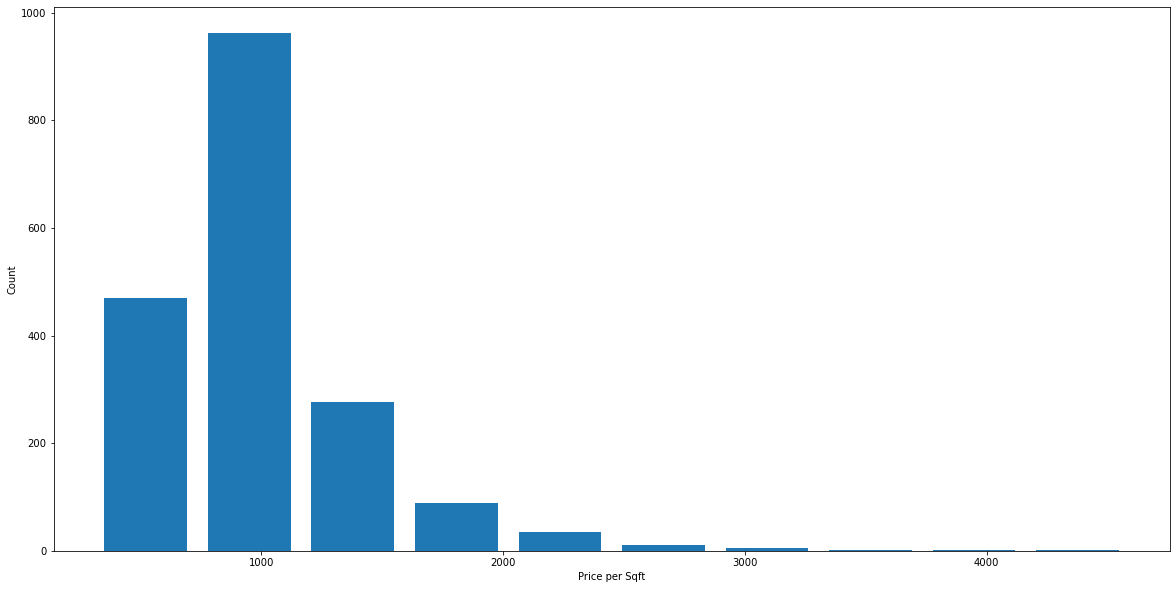

In [164]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft, rwidth = 0.8, bins = 10)
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

In [165]:
df6 = df5.drop(['sqft','price_per_sqft','House Type','City/County'],axis='columns')
df6.head(3)

,Price,Bedroom,Bathroom,Location
0,1675000,5,5,Wimbledon
1,650000,2,2,Clerkenwell
2,735000,2,2,Putney


## one hot encoding

In [166]:
dummies = pd.get_dummies(df6.Location)
dummies.head(3)

,101 Wood Lane,3 City North Place,63 Mortlake High Street,82-88 Fulham High Street,Acton,Albert Bridge Road,Barnes,Barnsbury,Battersea,Bayswater,...,Victoria,Waltham Abbey,Walton-on-Thames,Wandsworth,Water Lane,Watford,Westminster,Wimbledon,Woodford Green,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
df7 = pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,Price,Bedroom,Bathroom,Location,101 Wood Lane,3 City North Place,63 Mortlake High Street,82-88 Fulham High Street,Acton,Albert Bridge Road,...,Vauxhall,Victoria,Waltham Abbey,Walton-on-Thames,Wandsworth,Water Lane,Watford,Westminster,Wimbledon,Woodford Green
0,1675000,5,5,Wimbledon,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,650000,2,2,Clerkenwell,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,735000,2,2,Putney,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1765000,4,4,Putney,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,675000,2,2,Putney,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df7.shape

(2505, 98)

In [169]:
df8 = df7.drop(['Location'],axis='columns')

In [170]:
X = df8.drop(['Price'],axis='columns')
X.head(3)

,Bedroom,Bathroom,101 Wood Lane,3 City North Place,63 Mortlake High Street,82-88 Fulham High Street,Acton,Albert Bridge Road,Barnes,Barnsbury,...,Vauxhall,Victoria,Waltham Abbey,Walton-on-Thames,Wandsworth,Water Lane,Watford,Westminster,Wimbledon,Woodford Green
0,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
X.shape

(2505, 96)

In [172]:
y = df8.Price
y.head(3)

0    1675000
1     650000
2     735000
Name: Price, dtype: int64

In [173]:
len(y)

2505

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [175]:
#from sklearn import preprocessing

#def convert(data):
#    number = preprocessing.LabelEncoder()
 #   data['Location'] = number.fit_transform(data['Location'])
 #   data=data.fillna(-999) # fill holes with default value
 #   return data

In [176]:
#convert(X)

In [177]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5070249189532259


## measure accuracy of linear regression model


In [178]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.47355645, 0.46446608, 0.36750611, 0.3543904 , 0.29892983])

## find best model with grid search cv

In [179]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.391861,{'normalize': True}
1,lasso,0.391785,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.293533,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [191]:
def predict_price(Location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = Bedrooms
    x[2] = Bathrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [193]:
predict_price('Hampstead Garden Suburb', 1500, 2,2)

IndexError: index 0 is out of bounds for axis 0 with size 0